In [1]:
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns

sns.set_theme()


In [2]:
heart = pd.read_csv("heart.csv")
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Cleanup

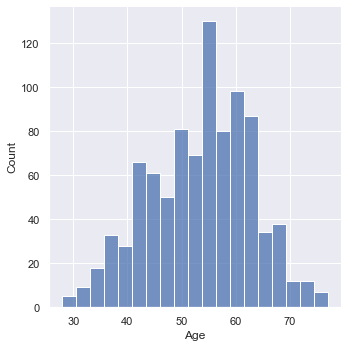

In [3]:
sns.displot(data=heart,x="Age")

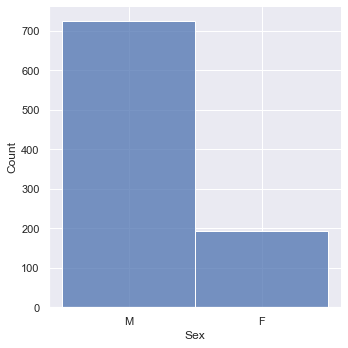

In [4]:
sns.displot(data=heart,x="Sex")

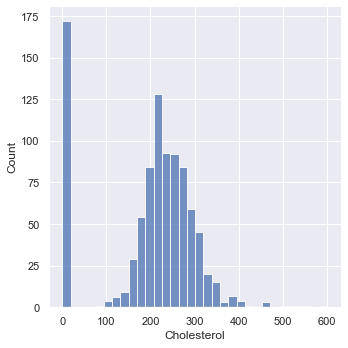

In [5]:
sns.displot(data=heart,x="Cholesterol")

Cholesterol Data should not have a 0 value. First, we will attempt to solve this by replacing with the mean

In [6]:
avgChol = heart[heart["Cholesterol"] != 0]["Cholesterol"].mean()
heart["Cholesterol"] = heart["Cholesterol"].replace(to_replace=0,value=avgChol)

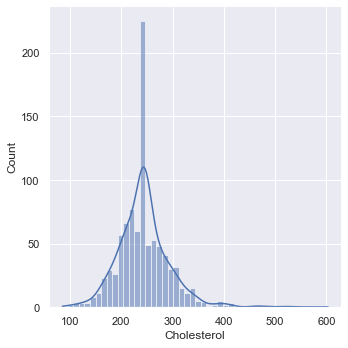

In [7]:
sns.displot(data=heart,x="Cholesterol",kde=True)

Proportion of records with 0 cholesterol is too great and has a drastic effect on the distribution. This feature will be left out of the model

In [8]:
# there is a records with a restingBP of 0. I replaced it with the average RestingBP
heart["RestingBP"] = heart["RestingBP"].replace(0,heart["RestingBP"].mean())

# Exploratory Data Analysis on the Data Set
Theories include:
- age is a significant risk factor
- those with heart pain will likely have heart disease
- higher cholesterol leads to higher heart disease

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

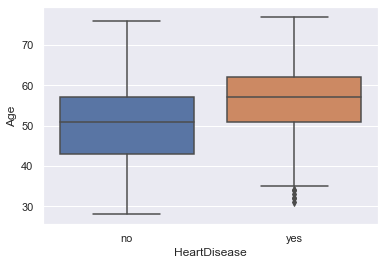

In [9]:
sns.boxplot(x="HeartDisease",y="Age",data=heart).set_xticklabels(["no","yes"])

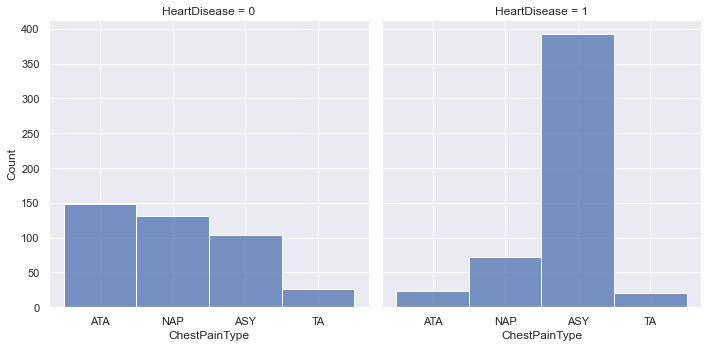

In [10]:
sns.displot(data=heart,x="ChestPainType",col="HeartDisease")

Majority of cases with patients with heart disease were asymtpomatic. Potential cause could be that they weren't diagnosed early enough to take care of it

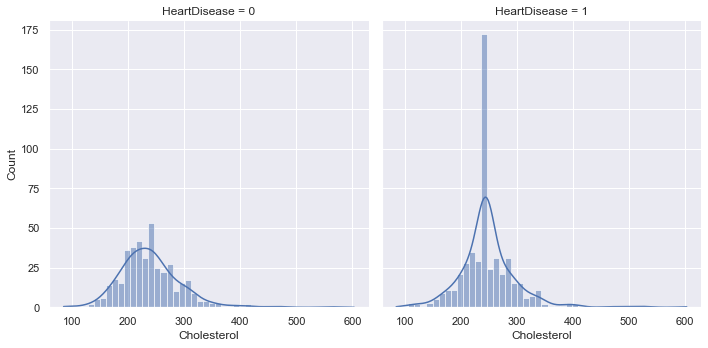

In [11]:
sns.displot(data=heart,x="Cholesterol",col="HeartDisease",kde=True)

Distribution of age for those with heart disease has a left skew, adding support to the argument taht those with heart disease have a higher age

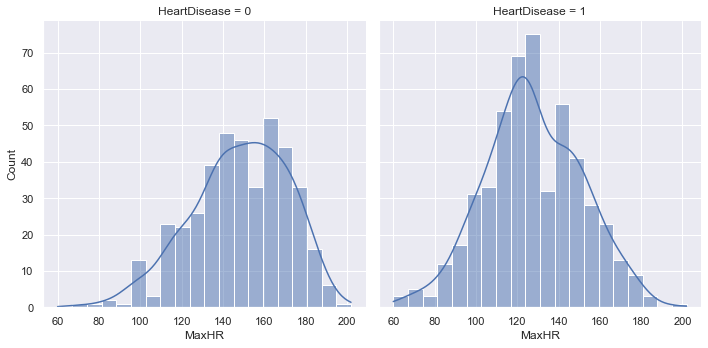

In [12]:
sns.displot(data=heart,x="MaxHR",col="HeartDisease",kde=True)

Those with a heart disease have a lower heart rate on average as well

M    725
F    193
Name: Sex, dtype: int64

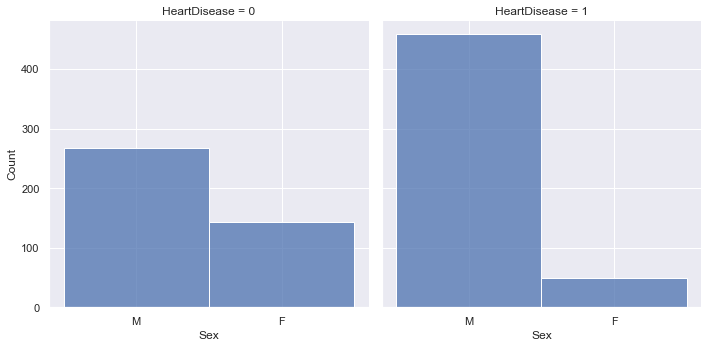

In [13]:
sns.displot(data=heart,x="Sex",col="HeartDisease")
heart["Sex"].value_counts()

Those with Heart disease are much more likely to be men (90%), but the study was also mostly made of men (73%) leading to potential bias in the data

# Preprocessing

In [14]:
# One Hot encoding
heart = pd.get_dummies(heart,columns=["ChestPainType"])

# encoding sex
newSex = {
    "M":0,
    "F":1
}

heart["Sex"] = heart["Sex"].map(lambda x: newSex[x])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
features = ["Age","MaxHR","ChestPainType_ASY","ChestPainType_ATA","ChestPainType_NAP","ChestPainType_TA"]
X = heart[features]
y=heart["HeartDisease"]

train_X, val_X, train_y, val_y = train_test_split(X,y)

In [17]:
heart.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,0,140.0,289.0,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,1,160.0,180.0,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,0,130.0,283.0,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,1,138.0,214.0,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,0,150.0,195.0,0,Normal,122,N,0.0,Up,0,0,0,1,0


# Model Creation

In [18]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier()

neigh.fit(train_X,train_y)

pred_y = neigh.predict(val_X)

In [19]:
# right xx % of the time
percentRight = np.mean(pred_y == val_y) * 100


# evaluatin of a classifier that would only produce "no"
naive = np.mean(val_y == 0) * 100

print("Percent Right:", percentRight)
print("Always False:", naive)

Percent Right: 67.3913043478261
Always False: 45.65217391304348
